In [5]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename='log/ingestion_db.log',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filemode="a"
)

In [6]:
# engine= create_engine('sqlite:///inventory.db')

In [7]:
'''engine= create_engine('sqlite:///inventory.db')

def ingest_db(df,table_name,engine):
  df.to_sql(table_name, con=engine, if_exists='replace',index=False)

def load_rae_data:
  start= time.time()
  for file in os.listdir('/content/'):
      if '.csv' in file:
        df=pd.read_csv('/content/'+file)
        logging.info(f'Ingesting {file} in db')
        ingest_db(df,file[:-4],engine)
  end=time.time()
  total_time=(end-start)/60
  logging.info('ingestion completed')
  logging.info(f'\n Total time taken: {total_time} minutes')


 if __name__=='_main_':
    load_raw_data()'''


"engine= create_engine('sqlite:///inventory.db')\n\ndef ingest_db(df,table_name,engine):\n  df.to_sql(table_name, con=engine, if_exists='replace',index=False)\n\ndef load_rae_data:\n  start= time.time()\n  for file in os.listdir('/content/'):\n      if '.csv' in file:\n        df=pd.read_csv('/content/'+file)\n        logging.info(f'Ingesting {file} in db')\n        ingest_db(df,file[:-4],engine)\n  end=time.time()\n  total_time=(end-start)/60\n  logging.info('ingestion completed')\n  logging.info(f'\n Total time taken: {total_time} minutes')\n\n\n if __name__=='_main_':\n    load_raw_data()"

In [8]:
# def ingest_db(df,table_name,engine):
#   df.to_sql(table_name, con=engine, if_exists='replace',index=False)

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import os
import logging
import time


# Logging setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def ingest_db(df, table_name, engine):
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)

def load_raw_data():
    engine = create_engine('sqlite:///inventory.db')
    start = time.time()
    for file in os.listdir('/content/'):
        if file.endswith('.csv'):
            df = pd.read_csv(os.path.join('/content/', file))
            logging.info(f'Ingesting {file} into DB')
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start) / 60
    logging.info('Ingestion completed')
    logging.info(f'Total time taken: {total_time:.2f} minutes')

if __name__ == '__main__':
    load_raw_data()

# **Exploratory Data Analysis**

In [10]:
import pandas as pd
import sqlite3

In [11]:
# creating db connextion
conn= sqlite3.connect('inventory.db')

In [12]:
tables= pd.read_sql("""SELECT name AS table_name FROM sqlite_master WHERE type='table'; """,conn)
tables

,table_name
0,sales
1,purchase_prices
2,end_inventory
3,purchases
4,begin_inventory
5,vendor_invoice


In [13]:
for table in tables['table_name']:
  print('-'*50, f'{table}','-'*50)
  print('count of records:',pd.read_sql(f"SELECT count (*)as count FROM {table}",conn)['count'].values[0])
  display(pd.read_sql(f"SELECT * FROM {table} limit 5",conn))

-------------------------------------------------- sales --------------------------------------------------
count of records: 860125


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546.0,JIM BEAM BRANDS COMPANY


-------------------------------------------------- purchase_prices --------------------------------------------------
count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- end_inventory --------------------------------------------------
count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- begin_inventory --------------------------------------------------
count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- vendor_invoice --------------------------------------------------
count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [14]:
purchases=pd.read_sql("SELECT * FROM purchases where VendorNumber= 4466",conn)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
1,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
2,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
3,38_GOULCREST_5215,38,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-07,2024-01-19,2024-02-26,9.41,6,56.46,1
4,59_CLAETHORPES_5215,59,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8207,2023-12-27,2024-01-05,2024-01-19,2024-02-26,9.41,6,56.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,81_PEMBROKE_5215,81,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-29,2025-01-04,2025-02-10,9.41,6,56.46,1
2188,62_KILMARNOCK_5255,62,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.35,5,46.75,1
2189,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-28,2025-01-04,2025-02-10,9.41,5,47.05,1
2190,6_GOULCREST_5215,6,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,13595,2024-12-20,2024-12-31,2025-01-04,2025-02-10,9.41,6,56.46,1


In [15]:
purchase_prices=pd.read_sql("SELECT * FROM purchase_prices where VendorNumber= 4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [16]:
vendor_invoice=pd.read_sql("SELECT * FROM vendor_invoice where VendorNumber= 4466",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [17]:
sales = pd.read_sql("SELECT * FROM sales where VendorNo = 4466", conn)
display(sales)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,74_PAENTMARWY_5255,74,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-01-28,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
351,74_PAENTMARWY_5255,74,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-01-29,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
352,75_BARNCOMBE_5255,75,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466.0,AMERICAN VINTAGE BEVERAGE
353,75_BARNCOMBE_5255,75,5255,TGI Fridays Ultimte Mudslide,1.75L,2,25.98,12.99,2024-01-15,1750.0,1,3.67,4466.0,AMERICAN VINTAGE BEVERAGE


In [18]:
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


In [19]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [20]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [21]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
5215,3390.39,1974.48,261
5255,3559.26,2636.97,274


In [22]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [23]:
freight_summary = pd.read_sql("SELECT VendorNumber,SUM(Freight) as FreightCost from vendor_invoice group by VendorNumber", conn)
display(freight_summary)

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [24]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [28]:
pd.read_sql("""select p.VendorNumber,p.VendorName,p.Brand,p.PurchasePrice,pp.Volume,pp.Price as ActualPrice, SUM(Quantity) as TotalPurchaseQuantity, SUM(Dollars) as TotalPurchaseDollars from purchases p JOIN purchase_prices pp
  ON p.Brand=pp.Brand
   where p.PurchasePrice >0
  GROUP BY p.VendorNumber,p.VendorName,p.Brand ORDER BY TotalPurchaseDollars""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [30]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [32]:
pd.read_sql(""" SELECT
  VendorNo,
  Brand,
  SUM(SalesDollars) as TotalSalesDollars,
  SUM(SalesPrice) as TotalSalesPrice,
  SUM(SalesQuantity) as TotalSalesQuantity,
  SUM(ExciseTax) as TotalExciseTax
FROM
  sales
GROUP BY
  VendorNo,
  Brand
  Order by TotalSalesDollars
  """,conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004.0,5287,0.98,0.98,2,0.10
1,3960.0,3303,0.99,0.99,1,0.05
2,9206.0,2773,0.99,0.99,1,0.05
3,9625.0,8872,0.99,0.99,1,0.05
4,3252.0,3933,1.98,0.99,2,0.10
...,...,...,...,...,...,...
7484,4425.0,3405,220846.36,42135.95,7364,13530.18
7485,17035.0,8068,226611.41,39179.86,8759,16093.28
7486,1128.0,1233,289539.55,53085.25,8045,14781.55
7487,3960.0,3545,304980.72,42893.79,10128,18609.15


In [ ]:
# # import time
# # start = time.time()
# final_table = pd.read_sql_query("""SELECT
# pp. VendorNumber,
# pp. Brand,
# pp. Price as ActualPrice,
# pp. PurchasePrice,
# SUM(s.SalesQuantity) AS TotalSalesQuantity,
# SUM(s.SalesDollars) AS TotalSalesDollars,
# SUM(s.SalesPrice) AS TotalSalesPrice,
# SUM(s.ExciseTax) AS TotalExciseTax,
# SUM(vi.Quantity) AS TotalPurchaseQuantity,
# SUM(vi.Dollars) AS TotalPurchaseDollars,
# SUM(vi.Freight) AS TotalFreightCost
# FROM purchase_prices pp
# JOIN sales s
# ON pp. VendorNumber = s. VendorNo
# AND pp. Brand = s. Brand
# JOIN vendor_invoice vi
# ON pp. VendorNumber = vi. VendorNumber
# GROUP BY pp. VendorNumber, pp. Brand, pp. Price, pp. PurchasePrice
# """, conn)
# # end = time.time()

In [5]:
vendor_sales_summary = pd.read_sql_query("""
WITH FreightSummary AS (
    SELECT
        VendorNumber,
        SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),
PurchaseSummary AS (
    SELECT
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description,
             p.PurchasePrice, pp.Price, pp.Volume
),
SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
)
SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
   AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
""", conn)


In [6]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,8045.0,289539.55,53085.25,14781.55,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,7364.0,220846.36,42135.95,13530.18,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,8759.0,226611.41,39179.86,16093.28,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,16199.0,356216.01,35689.77,29764.43,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,10128.0,304980.72,42893.79,18609.15,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,NaN,NaN,NaN,NaN,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,128.0,62.72,0.98,6.72,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,NaN,NaN,NaN,NaN,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,6.0,11.94,7.96,1.26,257032.07


In [7]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


In [8]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,3690


In [9]:
vendor_sales_summary.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,8045.0,289539.55,53085.25,14781.55,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,7364.0,220846.36,42135.95,13530.18,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,8759.0,226611.41,39179.86,16093.28,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,16199.0,356216.01,35689.77,29764.43,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,10128.0,304980.72,42893.79,18609.15,257032.07


In [10]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [11]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

In [12]:
vendor_sales_summary['Volume']=vendor_sales_summary['Volume'].astype('float64')

In [13]:
vendor_sales_summary.fillna(0,inplace=True)

In [14]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [15]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [16]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,float64
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


In [17]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [18]:
vendor_sales_summary['GrossProfit'].min()

-3583194.859999953

In [19]:
vendor_sales_summary['ProfitMargin']=(vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotalPurchaseDollars'])*100

In [20]:
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

In [21]:
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [22]:
cursor=conn.cursor()

In [24]:
cursor.execute("""CREATE TABLE vendor_sales_summary (
VendorNumber INT,
VendorName VARCHAR(100),
Brand INT,
Description VARCHAR(100),
PurchasePrice DECIMAL(10,2),
ActualPrice DECIMAL(10,2),
Volume DECIMAL(15,2),
TotalPurchaseQuantity INT,
TotalPurchaseDollars DECIMAL(15,2),
TotalSalesQuantity INT,
TotalSalesDollars DECIMAL(15,2),
TotalSalesPrice DECIMAL(15,2),
TotalExciseTax DECIMAL(15,2),
FreightCost DECIMAL(15,2),
GrossProfit DECIMAL(15,2),
ProfitMargin DECIMAL(15,2),
StockTurnover DECIMAL(15,2),
SalesToPurchaseRatio DECIMAL(15,2),
PRIMARY KEY (VendorNumber, Brand)
);
""")

In [27]:
pd.read_sql("SELECT * FROM vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,8045.0,289539.55,53085.25,14781.55,68601.68,-3521712.05,-92.403032,0.055452,0.075970
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,7364.0,220846.36,42135.95,13530.18,144929.24,-3583194.86,-94.194428,0.044892,0.058056
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,8759.0,226611.41,39179.86,16093.28,123780.22,-3191692.27,-93.370647,0.046738,0.066294
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,16199.0,356216.01,35689.77,29764.43,257032.07,-2904981.93,-89.077142,0.080320,0.109229
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,10128.0,304980.72,42893.79,18609.15,257032.07,-2718225.29,-89.912010,0.073333,0.100880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,0.0,0.00,0.00,0.00,27100.41,-2.64,-100.000000,0.000000,0.000000
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,2580.341880,21.333333,26.803419
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.0,0.00,0.00,0.00,14069.87,-1.48,-100.000000,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,6.0,11.94,7.96,1.26,257032.07,10.47,712.244898,6.000000,8.122449


In [26]:
vendor_sales_summary.to_sql('vendor_sales_summary',conn,if_exists='replace',index=False)

10692

In [ ]:
# 1:01:09

In [29]:
import sqlite3
import pandas as pd
import logging
import os
import time

logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def ingest_db(df,table_name,engine):
  df.to_sql(table_name, con=engine, if_exists='replace',index=False)


def create_vendor_summary(conn):
    """
    This function merges the different tables to get the overall vendor summary
    and adds new columns in the resultant data.
    """
    vendor_sales_summary = pd.read_sql_query("""
    WITH FreightSummary AS (
        SELECT
            VendorNumber,
            SUM(Freight) AS FreightCost
        FROM vendor_invoice
        GROUP BY VendorNumber
    ),
    PurchaseSummary AS (
        SELECT
            p.VendorNumber,
            p.VendorName,
            p.Brand,
            p.Description,
            p.PurchasePrice,
            pp.Price AS ActualPrice,
            pp.Volume,
            SUM(p.Quantity) AS TotalPurchaseQuantity,
            SUM(p.Dollars) AS TotalPurchaseDollars
        FROM purchases p
        JOIN purchase_prices pp
            ON p.Brand = pp.Brand
        WHERE p.PurchasePrice > 0
        GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description,
                 p.PurchasePrice, pp.Price, pp.Volume
    ),
    SalesSummary AS (
        SELECT
            VendorNo,
            Brand,
            SUM(SalesQuantity) AS TotalSalesQuantity,
            SUM(SalesDollars) AS TotalSalesDollars,
            SUM(SalesPrice) AS TotalSalesPrice,
            SUM(ExciseTax) AS TotalExciseTax
        FROM sales
        GROUP BY VendorNo, Brand
    )
    SELECT
        ps.VendorNumber,
        ps.VendorName,
        ps.Brand,
        ps.Description,
        ps.PurchasePrice,
        ps.ActualPrice,
        ps.Volume,
        ps.TotalPurchaseQuantity,
        ps.TotalPurchaseDollars,
        ss.TotalSalesQuantity,
        ss.TotalSalesDollars,
        ss.TotalSalesPrice,
        ss.TotalExciseTax,
        fs.FreightCost
    FROM PurchaseSummary ps
    LEFT JOIN SalesSummary ss
        ON ps.VendorNumber = ss.VendorNo
       AND ps.Brand = ss.Brand
    LEFT JOIN FreightSummary fs
        ON ps.VendorNumber = fs.VendorNumber
    ORDER BY ps.TotalPurchaseDollars DESC
    """, conn)

    return vendor_sales_summary


def clean_data(df):
    """This function will clean the data"""

    # Changing datatype to float
    df['Volume'] = df['Volume'].astype(float)

    # Filling missing values with 0
    df.fillna(0, inplace=True)

    # Removing spaces from categorical columns
    df['VendorName'] = df['VendorName'].str.strip()
    df['Description'] = df['Description'].str.strip()

    # Creating new columns for better analysis
    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (
        df['GrossProfit'] / df['TotalSalesDollars']
    ) * 100
    df['StockTurnover'] = (
        df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']
    )
    df['SalesToPurchaseRatio'] = (
        df['TotalSalesDollars'] / df['TotalPurchaseDollars']
    )

    return df



if __name__ == "__main__":
    # Creating database connection
    conn = sqlite3.connect('inventory.db')

    logging.info('Creating Vendor Summary Table.....')
    summary_df = create_vendor_summary(conn)
    logging.info(f"\n{summary_df.head()}")

    logging.info('Cleaning Data.....')
    clean_df = clean_data(summary_df.copy())  # passing both df and copy
    logging.info(f"\n{clean_df.head()}")

    logging.info('Ingesting data.....')
    # Create engine here
    engine = create_engine('sqlite:///inventory.db')
    ingest_db(clean_df, 'vendor_sales_summary', engine)

    logging.info('Completed')

NameError: name 'create_engine' is not defined

# **DATA ANALYSIS USING PYTHON**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings ('ignore')

In [2]:
#load data set

conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query('select * from vendor_sales_summary',conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,8045.0,289539.55,53085.25,14781.55,68601.68,-3521712.05,-92.403032,0.055452,0.075970
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,7364.0,220846.36,42135.95,13530.18,144929.24,-3583194.86,-94.194428,0.044892,0.058056
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,8759.0,226611.41,39179.86,16093.28,123780.22,-3191692.27,-93.370647,0.046738,0.066294
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,16199.0,356216.01,35689.77,29764.43,257032.07,-2904981.93,-89.077142,0.080320,0.109229
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,10128.0,304980.72,42893.79,18609.15,257032.07,-2718225.29,-89.912010,0.073333,0.100880


In [3]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00,750.0000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,188.133371,717.427158,0.00,0.0000,12.000000,107.000000,2.402400e+04
TotalSalesDollars,10692.0,2548.742445,9997.789798,0.00,0.0000,209.675000,1742.205000,3.562160e+05
TotalSalesPrice,10692.0,1239.698636,3185.026404,0.00,0.0000,107.980000,1025.437500,5.308525e+04


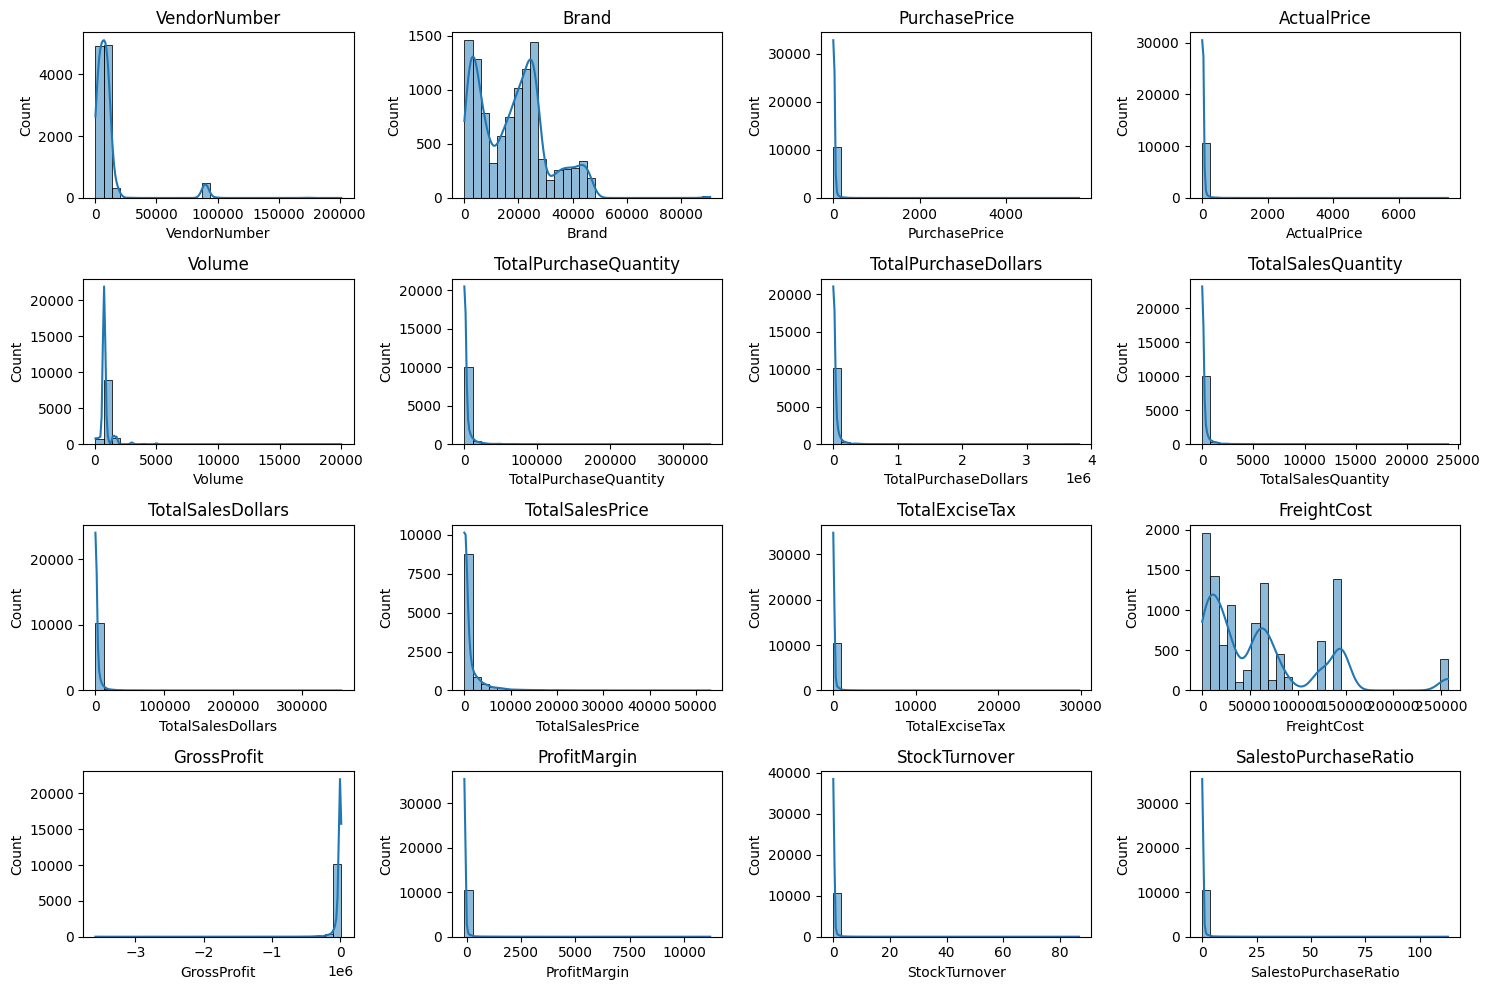

In [5]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes (include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df [col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

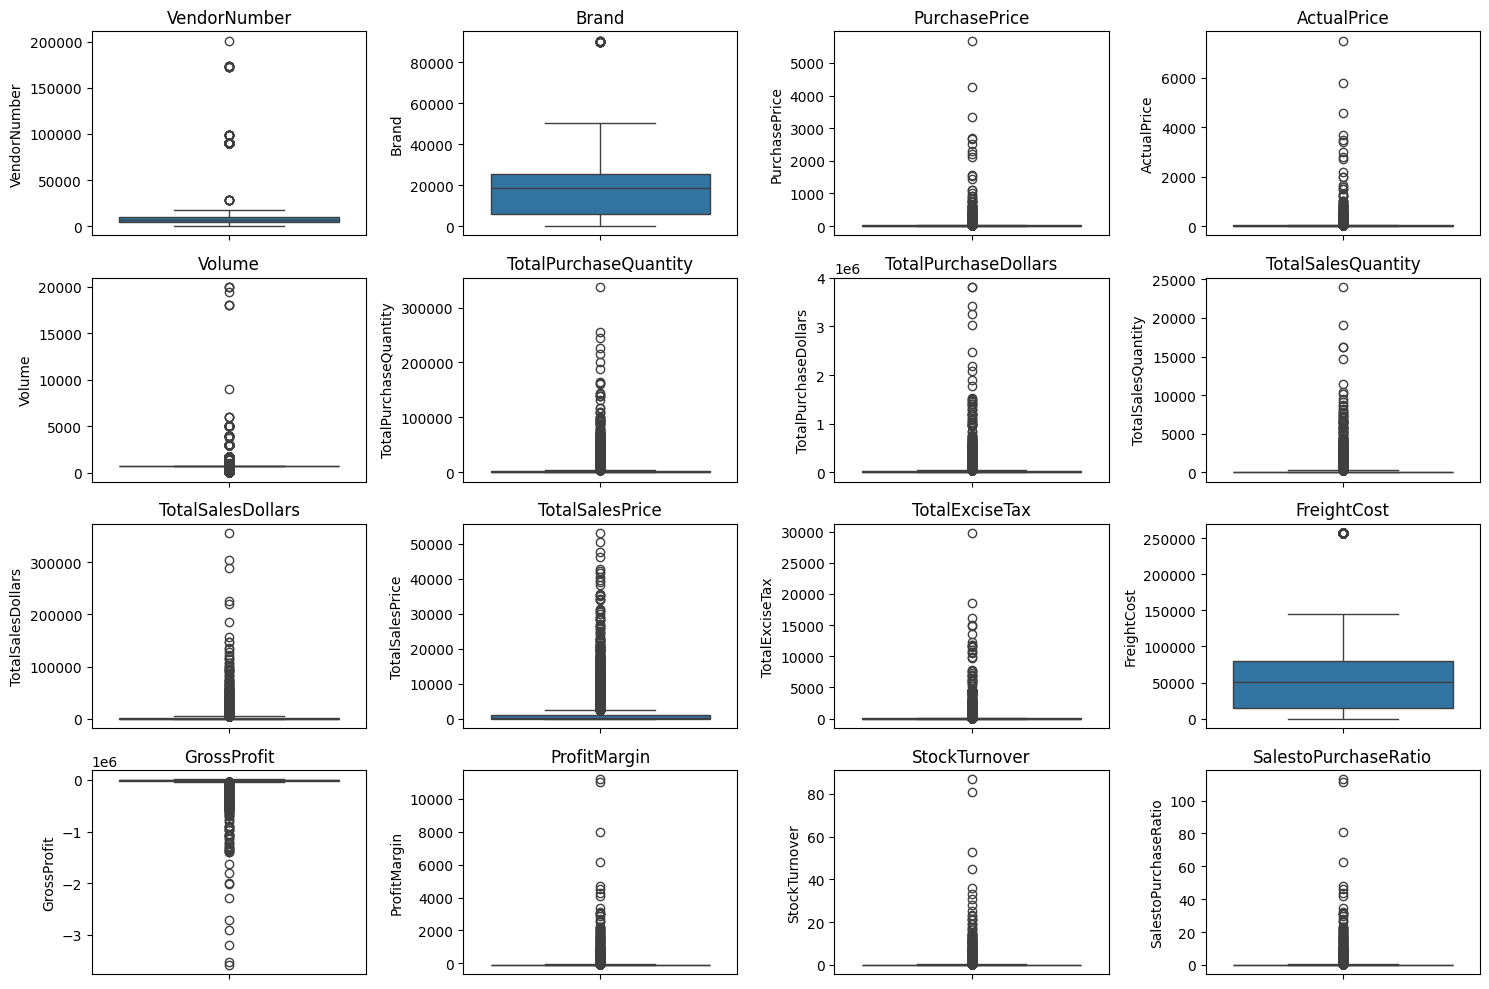

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)   # 4x4 grid of plots
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [10]:
#let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [11]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,250,24832.50,176.0,26398.24,1049.93,19.77,28720.52,1565.74,6.305205,0.704000,1.063052
1,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,846,12529.26,774.0,15472.26,6056.97,609.74,89286.27,2943.00,23.489017,0.914894,1.234890
2,9165,ULTRA BEVERAGE COMPANY LLP,24379,Madison's Ranch Cab Svgn,8.78,12.99,750.0,1359,11932.02,1765.0,22927.35,5559.72,197.91,68054.70,10995.33,92.149778,1.298749,1.921498
3,9165,ULTRA BEVERAGE COMPANY LLP,22447,Pizzolato Pnt Grigio,4.72,12.99,750.0,2096,9893.12,1708.0,11938.92,4368.75,191.00,68054.70,2045.80,20.679017,0.814885,1.206790
4,2555,DISARONNO INTERNATIONAL LLC,1212,DiSaronna Amaretto Sour VAP,14.38,21.99,750.0,563,8095.94,645.0,14013.55,7064.75,508.02,5861.03,5917.61,73.093551,1.145648,1.730936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,2182.012195,15.000000,22.820122
608,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,257032.07,21.04,740.845070,6.000000,8.408451
609,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,2580.341880,21.333333,26.803419
610,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,6.0,11.94,7.96,1.26,257032.07,10.47,712.244898,6.000000,8.122449


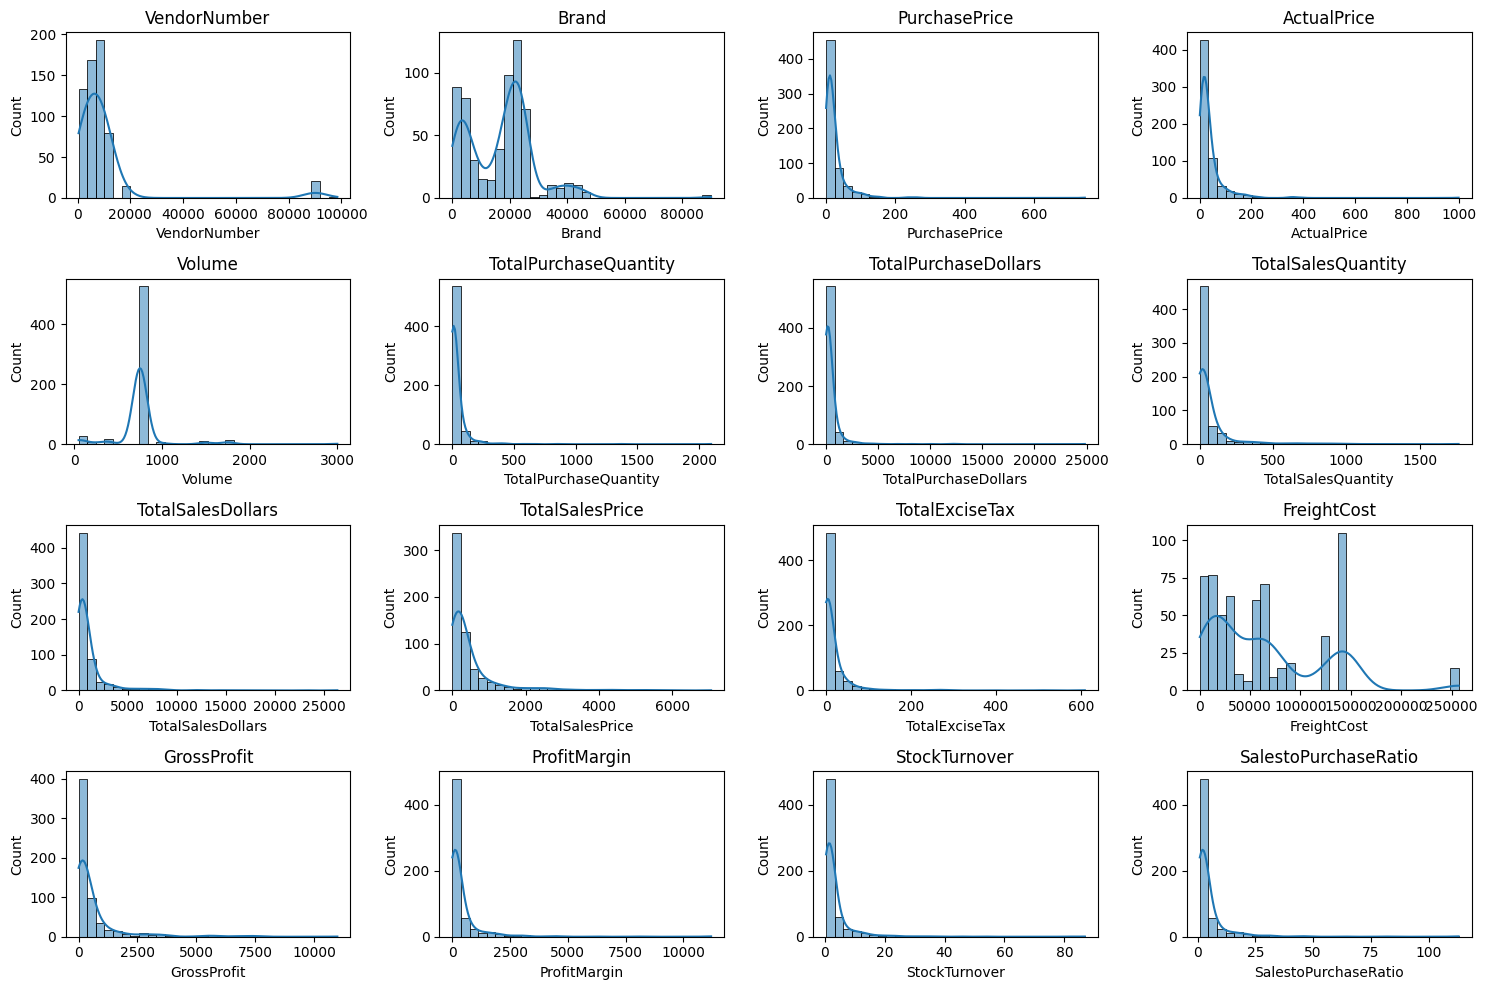

In [12]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes (include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate (numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df [col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

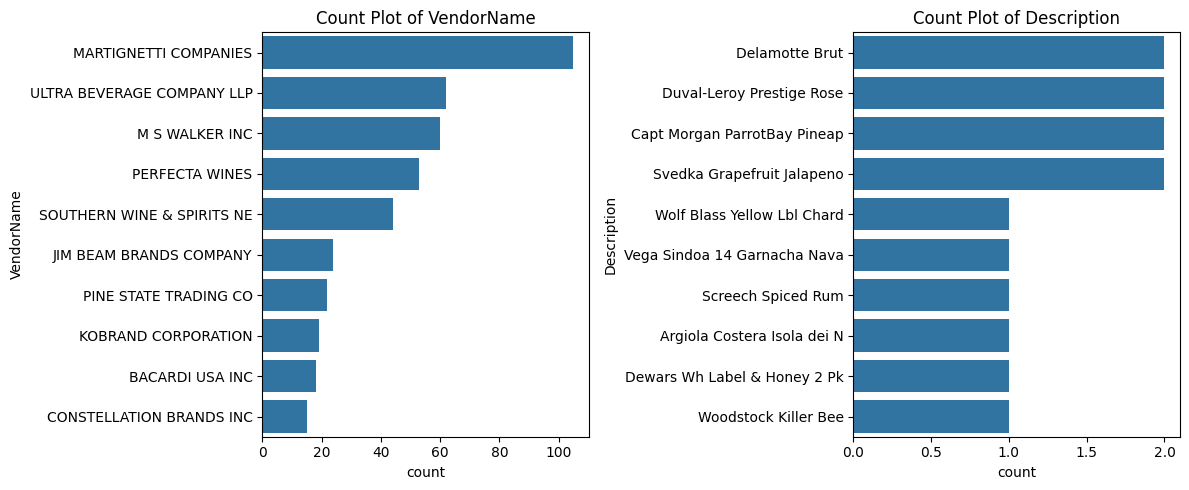

In [13]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


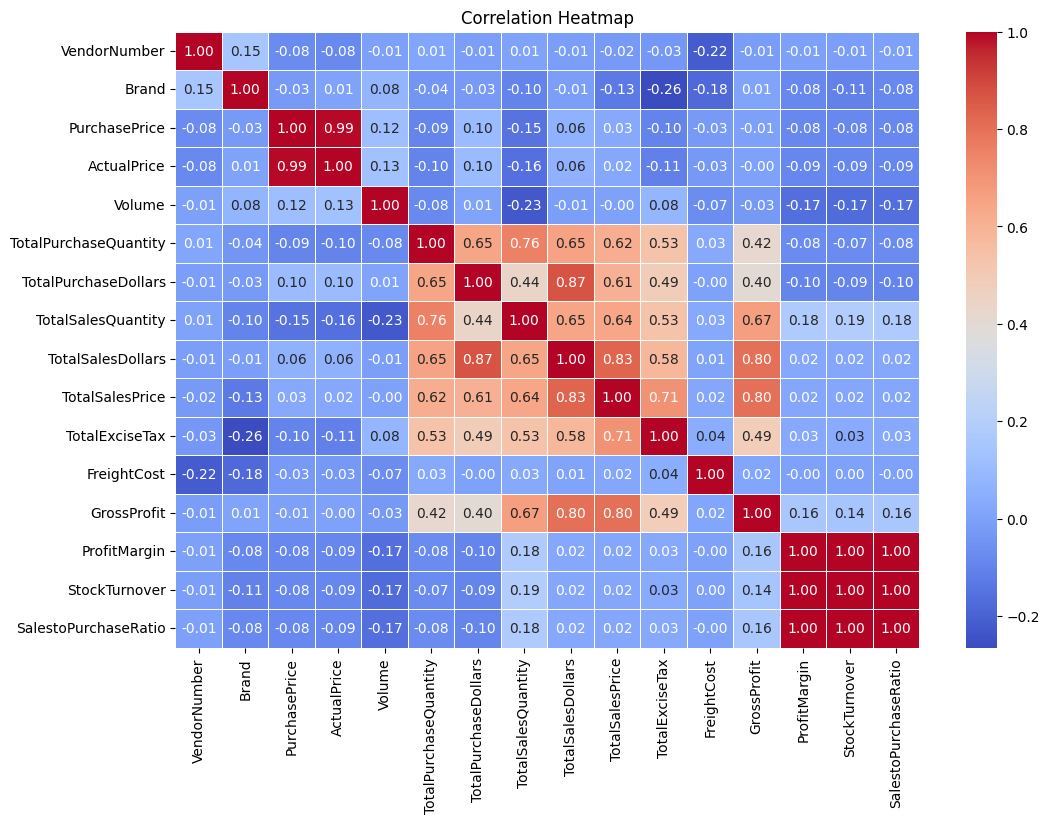

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df [numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Correlation Insights**
Purchase Price has weak correlations with TotalSales Dollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

In [18]:
brand_performance=df.groupby('Description').agg({
'TotalSalesDollars':'sum',
'ProfitMargin':'mean'}).reset_index()



In [22]:
# Create brand_performance first (example: grouped by Brand)
brand_performance = df.groupby("Brand", as_index=False).agg({
    "TotalSalesDollars": "sum",
    "ProfitMargin": "mean"
}).reset_index()

# Now you can calculate thresholds
low_sales_threshold = brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin_threshold = brand_performance["ProfitMargin"].quantile(0.85)


In [23]:
low_sales_threshold

np.float64(105.6265)

In [24]:
high_margin_threshold

np.float64(624.6072728676892)

In [26]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance [
(brand_performance ['TotalSalesDollars'] <= low_sales_threshold) &
(brand_performance ['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,index,Brand,TotalSalesDollars,ProfitMargin
169,169,6127,11.94,712.244898
63,63,2626,23.88,740.845070
409,409,22619,39.95,625.045372
160,160,5683,62.72,2580.341880
192,192,8151,63.36,1015.492958
607,607,46135,74.85,2182.012195
151,151,5250,76.93,977.450980
87,87,3065,80.19,11194.366197
177,177,6916,89.94,710.270270
187,187,7902,98.01,2168.750000


In [29]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]
 #for better visualization

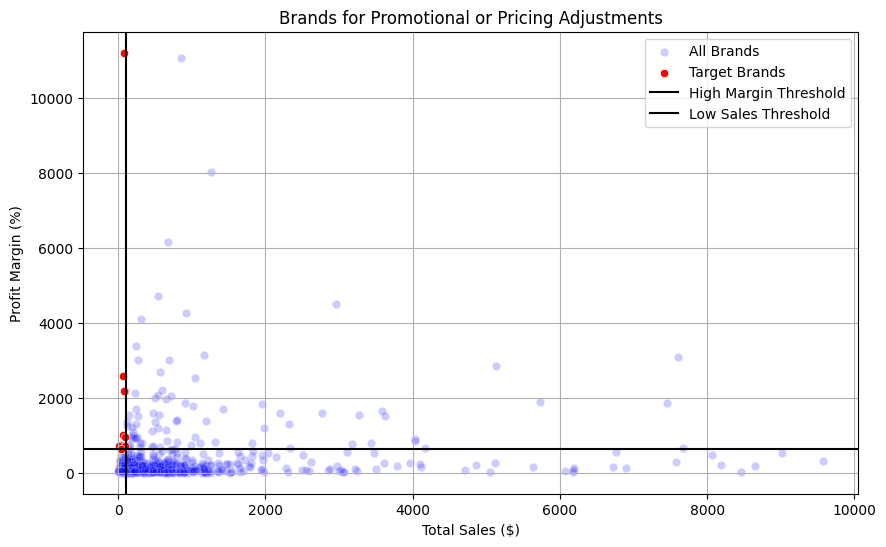

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_margin_threshold, linestyle='-', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='-', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

**Which vendors and brands demonstrate the highest sales performance?**

In [35]:
def format_dollars (value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K" # Added K for thousands
    else:
        return str(value)

In [32]:
#Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName") ["TotalSalesDollars"].sum().nlargest (10)
top_brands = df.groupby("Description") ["TotalSalesDollars"].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
ULTRA BEVERAGE COMPANY LLP,114589.03
MARTIGNETTI COMPANIES,102359.18
M S WALKER INC,63161.78
PERFECTA WINES,56241.87
SOUTHERN WINE & SPIRITS NE,39079.47
BACARDI USA INC,32803.38
JIM BEAM BRANDS COMPANY,24476.08
STATE WINE & SPIRITS,22559.08
BROWN-FORMAN CORP,17573.65


In [33]:
top_brands

,TotalSalesDollars
Description,
Ch La Rousseliere St Estephe,26398.24
Madison's Ranch Cab Svgn,22927.35
Bacardi Twin Pack 2/750mls,15472.26
DiSaronna Amaretto Sour VAP,14013.55
Pizzolato Pnt Grigio,11938.92
Robert Hall Cab Svgn,11849.53
Saddleback Clrs 09 Cab Svgn,9573.48
Parducci True Grit 11 Cab Sv,9018.36
Baracchi O'Lillo,8644.79


In [36]:
top_brands.apply(lambda x: format_dollars(x))

,TotalSalesDollars
Description,
Ch La Rousseliere St Estephe,26.40K
Madison's Ranch Cab Svgn,22.93K
Bacardi Twin Pack 2/750mls,15.47K
DiSaronna Amaretto Sour VAP,14.01K
Pizzolato Pnt Grigio,11.94K
Robert Hall Cab Svgn,11.85K
Saddleback Clrs 09 Cab Svgn,9.57K
Parducci True Grit 11 Cab Sv,9.02K
Baracchi O'Lillo,8.64K


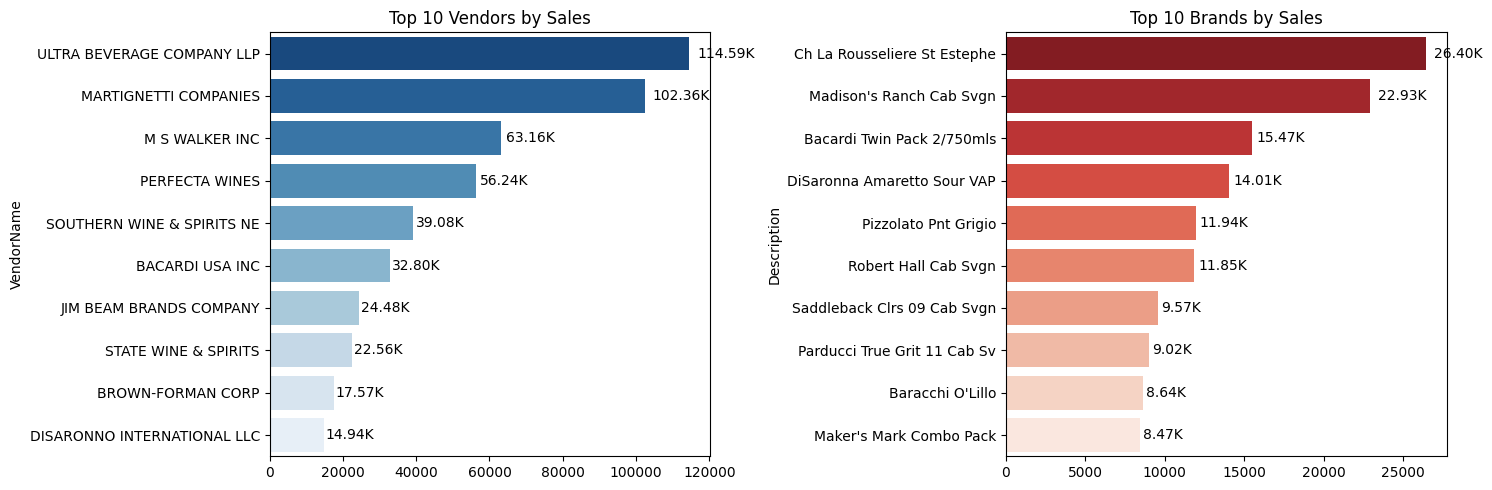

In [37]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


**Which vendor contribute the most to total purchase dollars?**

In [93]:
vendor_performance= df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [59]:
vendor_performance ['PurchaseConribution%'] = vendor_performance ['TotalPurchaseDollars']/ vendor_performance ['TotalPurchaseDollars'].sum()*100

In [54]:
vendor_performance=round(vendor_performance.sort_values('PurchaseConribution%',ascending=False),2)

In [60]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors ['TotalSalesDollars'] = top_vendors ['TotalSalesDollars'].apply(format_dollars)
top_vendors ['TotalPurchaseDollars'] = top_vendors ['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors ['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Conribution,PurchaseConribution%
55,ULTRA BEVERAGE COMPANY LLP,46.81K,67.78K,114.59K,0.16,16.070054
30,MARTIGNETTI COMPANIES,39.78K,62.58K,102.36K,0.14,13.657022
36,PERFECTA WINES,39.53K,16.71K,56.24K,0.14,13.569702
28,M S WALKER INC,22.04K,41.12K,63.16K,0.08,7.566991
2,BACARDI USA INC,19.36K,13.44K,32.80K,0.07,6.645571
46,SOUTHERN WINE & SPIRITS NE,15.72K,23.36K,39.08K,0.05,5.397476
24,JIM BEAM BRANDS COMPANY,12.77K,11.71K,24.48K,0.04,4.384013
14,DISARONNO INTERNATIONAL LLC,8.12K,6.83K,14.94K,0.03,2.786595
4,BROWN-FORMAN CORP,6.51K,11.06K,17.57K,0.02,2.234837
37,PERNOD RICARD USA,5.82K,7.40K,13.22K,0.02,1.997376


In [58]:
top_vendors ['Cumulative_Contribution%'] = top_vendors ['PurchaseConribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Conribution,PurchaseConribution%,Cumulative_Contribution%
55,ULTRA BEVERAGE COMPANY LLP,46.81K,67.78K,114.59K,0.16,0.16,0.16
30,MARTIGNETTI COMPANIES,39.78K,62.58K,102.36K,0.14,0.14,0.30
36,PERFECTA WINES,39.53K,16.71K,56.24K,0.14,0.14,0.44
28,M S WALKER INC,22.04K,41.12K,63.16K,0.08,0.08,0.52
2,BACARDI USA INC,19.36K,13.44K,32.80K,0.07,0.07,0.59
46,SOUTHERN WINE & SPIRITS NE,15.72K,23.36K,39.08K,0.05,0.05,0.64
24,JIM BEAM BRANDS COMPANY,12.77K,11.71K,24.48K,0.04,0.04,0.68
14,DISARONNO INTERNATIONAL LLC,8.12K,6.83K,14.94K,0.03,0.03,0.71
4,BROWN-FORMAN CORP,6.51K,11.06K,17.57K,0.02,0.02,0.73
37,PERNOD RICARD USA,5.82K,7.40K,13.22K,0.02,0.02,0.75


In [ ]:
# 1:27:36

KeyError: 'Cumulative_Contribution%'

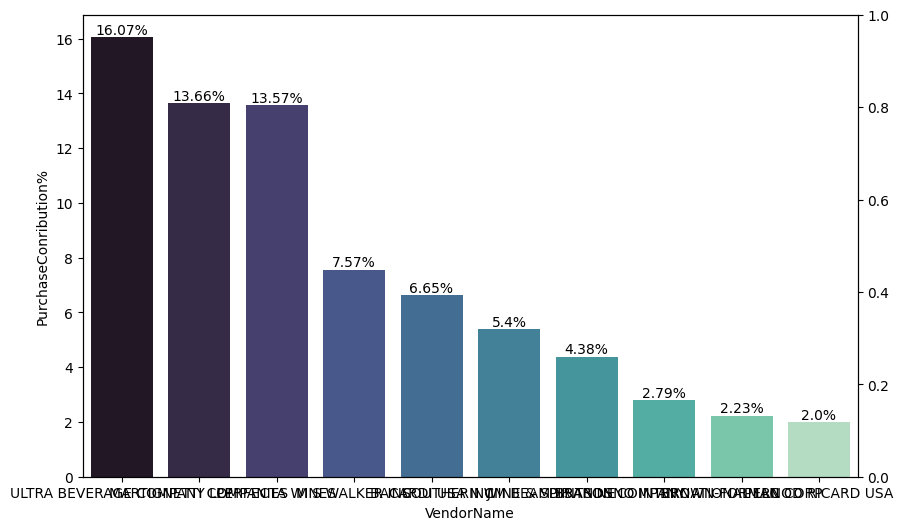

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contributions
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['PurchaseConribution%'],
    palette="mako",
    ax=ax1
)

# Add % labels on bars
for i, value in enumerate(top_vendors['PurchaseConribution%']):
    ax1.text(
        i,
        value,
        str(round(value, 2)) + '%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Line Plot for Cumulative Contributions
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Cumulative_Contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution'
)

# Add % labels on cumulative line
for i, value in enumerate(top_vendors['Cumulative_Contribution%']):
    ax2.text(
        i,
        value,
        str(round(value, 2)) + '%',
        ha='center',
        va='bottom',
        fontsize=10,
        color='red'
    )


# Axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Reference line and legend
ax2.axhline(y=80, color='gray', linestyle='dashed', alpha=0.7, label='80% Cumulative Contribution') # Added 80% line
ax2.legend(loc='upper left') # Adjusted legend location
ax1.legend(loc='upper right') # Added legend for bar plot

plt.tight_layout()
plt.show()

**How much of total procurement is dependent on the top vendors?**

In [65]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseConribution%'].sum(), 2)}%")

Total Purchase Contribution of top 10 vendors is 74.31%


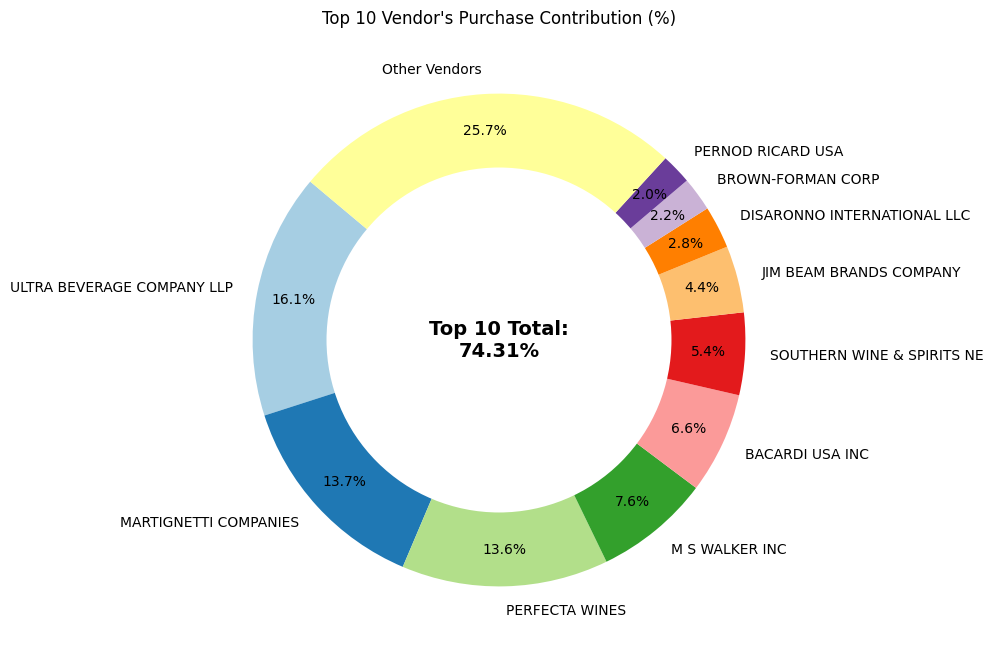

In [67]:
import matplotlib.pyplot as plt

# Extract vendor names and contributions
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseConribution%'].values)

# Calculate remaining contribution
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Title
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?**

In [68]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [69]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,10754,PERFECTA WINES,25197,Ch La Rousseliere St Estephe,99.33,149.99,750.0,250,24832.50,176.0,26398.24,1049.93,19.77,28720.52,1565.74,6.305205,0.704000,1.063052,99.33
1,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,846,12529.26,774.0,15472.26,6056.97,609.74,89286.27,2943.00,23.489017,0.914894,1.234890,14.81
2,9165,ULTRA BEVERAGE COMPANY LLP,24379,Madison's Ranch Cab Svgn,8.78,12.99,750.0,1359,11932.02,1765.0,22927.35,5559.72,197.91,68054.70,10995.33,92.149778,1.298749,1.921498,8.78
3,9165,ULTRA BEVERAGE COMPANY LLP,22447,Pizzolato Pnt Grigio,4.72,12.99,750.0,2096,9893.12,1708.0,11938.92,4368.75,191.00,68054.70,2045.80,20.679017,0.814885,1.206790,4.72
4,2555,DISARONNO INTERNATIONAL LLC,1212,DiSaronna Amaretto Sour VAP,14.38,21.99,750.0,563,8095.94,645.0,14013.55,7064.75,508.02,5861.03,5917.61,73.093551,1.145648,1.730936,14.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,1,3.28,15.0,74.85,39.92,1.68,2802.64,71.57,2182.012195,15.000000,22.820122,3.28
608,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,257032.07,21.04,740.845070,6.000000,8.408451,1.42
609,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,2580.341880,21.333333,26.803419,0.39
610,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,6.0,11.94,7.96,1.26,257032.07,10.47,712.244898,6.000000,8.122449,1.47


In [72]:
df ["OrderSize"] = pd.qcut(df ["TotalPurchaseQuantity"], q = 3, labels=["Small", "Medium", "Large"])

In [74]:
df [["OrderSize","TotalPurchaseQuantity"]]

,OrderSize,TotalPurchaseQuantity
0,Large,250
1,Large,846
2,Large,1359
3,Large,2096
4,Large,563
...,...,...
607,Small,1
608,Small,2
609,Small,6
610,Small,1


In [76]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,37.489788
Medium,21.165287
Large,11.972624


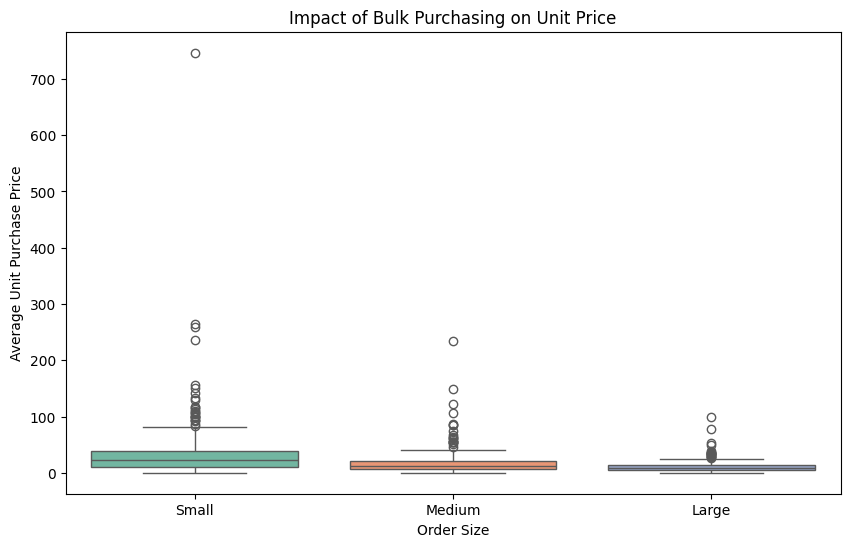

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**

In [80]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)


,StockTurnover
VendorName,
VINEXTRA INC,0.490566
BANFI PRODUCTS CORP,0.600000
SURVILLE ENTERPRISES CORP,0.666667
ATLANTIC IMPORTING COMPANY,0.709677
Serralles Usa LLC,0.727273
POVERTY LANE ORCHARDS,0.739496
TREASURY WINE ESTATES,0.740451
PERFECTA WINES,0.748087
KOBRAND CORPORATION,0.750000


**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**


In [82]:
df ["UnsoldInventoryValue"] = (df ["TotalPurchaseQuantity"] - df ["TotalSalesQuantity"]) * df ["PurchasePrice"]
print('Total Unsold Capital:', format_dollars (df ["UnsoldInventoryValue"].sum()))

Total Unsold Capital: -160587.18


In [84]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName") ["UnsoldInventoryValue"].sum().reset_index()
# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values (by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor ['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
36,PERFECTA WINES,2.21K
53,TREASURY WINE ESTATES,351.66
3,BANFI PRODUCTS CORP,338.12
50,SURVILLE ENTERPRISES CORP,240.72
56,VINEXTRA INC,201.96
1,ATLANTIC IMPORTING COMPANY,186.12
39,POVERTY LANE ORCHARDS,160.32
11,DELICATO VINEYARDS INC,160.16
52,THE IMPORTED GRAPE LLC,85.12
16,Dunn Wine Brokers,77.88


**What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.**

In [87]:
top_threshold= df ["TotalSalesDollars"].quantile(0.75)
low_threshold= df ["TotalSalesDollars"].quantile(0.25)

In [88]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase Conribution,PurchaseConribution%
55,ULTRA BEVERAGE COMPANY LLP,46.81K,67.78K,114.59K,0.16,16.070054
30,MARTIGNETTI COMPANIES,39.78K,62.58K,102.36K,0.14,13.657022
36,PERFECTA WINES,39.53K,16.71K,56.24K,0.14,13.569702
28,M S WALKER INC,22.04K,41.12K,63.16K,0.08,7.566991
2,BACARDI USA INC,19.36K,13.44K,32.80K,0.07,6.645571
46,SOUTHERN WINE & SPIRITS NE,15.72K,23.36K,39.08K,0.05,5.397476
24,JIM BEAM BRANDS COMPANY,12.77K,11.71K,24.48K,0.04,4.384013
14,DISARONNO INTERNATIONAL LLC,8.12K,6.83K,14.94K,0.03,2.786595
4,BROWN-FORMAN CORP,6.51K,11.06K,17.57K,0.02,2.234837
37,PERNOD RICARD USA,5.82K,7.40K,13.22K,0.02,1.997376


In [89]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    """
    Calculate the mean and confidence interval for a given dataset.

    Parameters:
        data (list/array): Sample data
        confidence (float): Confidence level (default=0.95)

    Returns:
        tuple: (mean, lower_bound, upper_bound)
    """
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)  # t critical value
    margin_of_error = t_critical * std_err

    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (315.05, 633.77), Mean: 474.41
Low Vendors 95% CI: (-17.25, 196.07), Mean: 89.41


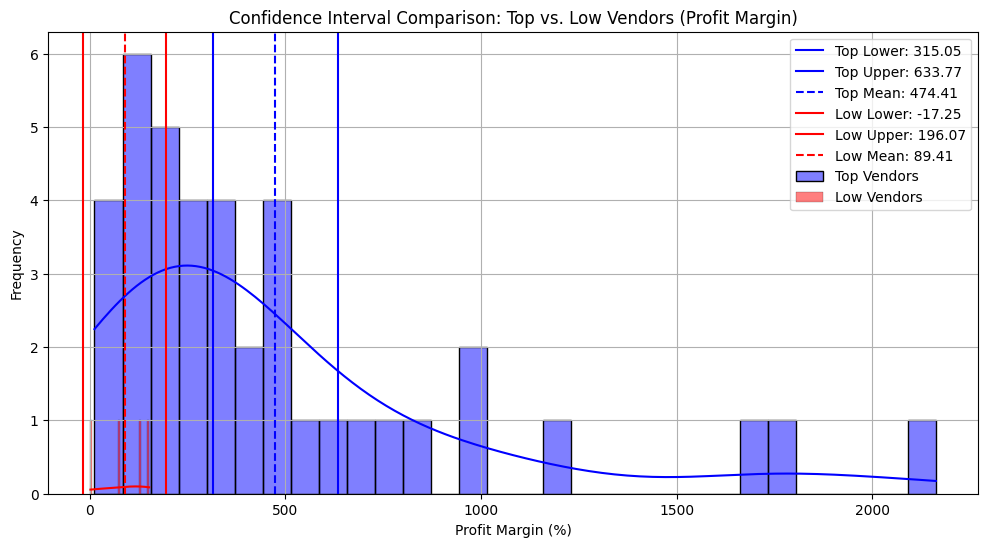

In [94]:
# Filter vendors based on sales thresholds
top_vendors_ci = vendor_performance[vendor_performance['TotalSalesDollars'] >= top_threshold]['ProfitMargin']
low_vendors_ci = vendor_performance[vendor_performance['TotalSalesDollars'] <= low_threshold]['ProfitMargin']

# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors_ci)
low_mean, low_lower, low_upper = confidence_interval(low_vendors_ci)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plotting
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors_ci, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="-", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="-", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}") # Changed linestyle for mean

# Low Vendors Plot
sns.histplot(low_vendors_ci, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="-", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="-", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}") # Changed linestyle for mean


# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Top Vendors 95% CI: (315.05, 633.77), Mean: 474.41
Low Vendors 95% CI: (-17.25, 196.07), Mean: 89.41


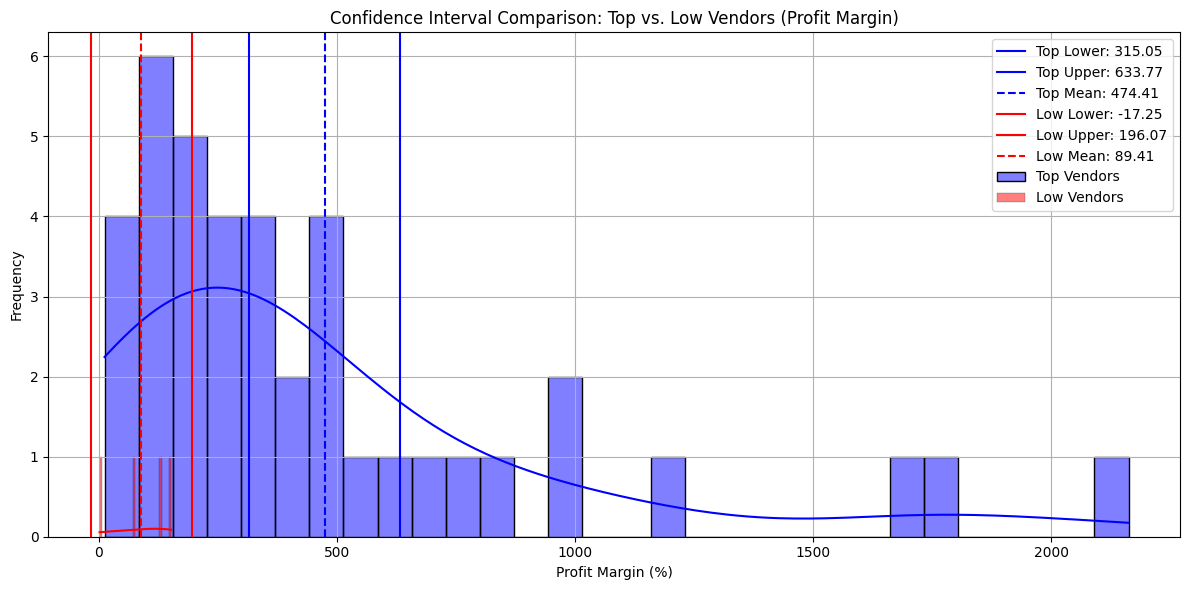

In [95]:
# Filter vendors based on sales thresholds
top_vendors_ci = vendor_performance[vendor_performance['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendors_ci = vendor_performance[vendor_performance['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

# Calculate confidence intervals safely
if len(top_vendors_ci) > 1:
    top_mean, top_lower, top_upper = confidence_interval(top_vendors_ci)
else:
    top_mean, top_lower, top_upper = (np.nan, np.nan, np.nan)

if len(low_vendors_ci) > 1:
    low_mean, low_lower, low_upper = confidence_interval(low_vendors_ci)
else:
    low_mean, low_lower, low_upper = (np.nan, np.nan, np.nan)

# Print Results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plotting
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors_ci, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
if not np.isnan(top_mean):
    plt.axvline(top_lower, color="blue", linestyle="-", label=f"Top Lower: {top_lower:.2f}")
    plt.axvline(top_upper, color="blue", linestyle="-", label=f"Top Upper: {top_upper:.2f}")
    plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors_ci, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
if not np.isnan(low_mean):
    plt.axvline(low_lower, color="red", linestyle="-", label=f"Low Lower: {low_lower:.2f}")
    plt.axvline(low_upper, color="red", linestyle="-", label=f"Low Upper: {low_upper:.2f}")
    plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
from scipy.stats import ttest_ind

# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Filter vendors and get ProfitMargin, dropping NaNs
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test (unequal variance)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H0: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H0: No significant difference in profit margins.")


T-Statistic: 1.6427, P-Value: 0.1015
Fail to Reject H0: No significant difference in profit margins.
